# ЛР №1 Методы вычислений
Врублевская Екатерина,
3 курс 13 группа

## Задание 1

Необходимо найти решение системы нелинейных уравнений $𝑓(𝑥) = 0$ с точностью
$𝜀 = 10^{-6}$ с помощью метода Ньютона, и дискретного варианта метода Ньютона (подбор шагов в замене производной выполнить самостоятельно, обосновать свой выбор). Требуется предварительно выбрать начальное приближение (можно графически). Для каждого метода укажите количество итераций, необходимое для достижения заданной точности (полученное на практике), и значение $𝑓(𝑥^𝑛)$, где $𝑥^𝑛$ – полученное решение. Сравните используемые методы решения систем нелинейных уравнений. Объясните быструю / медленную сходимость каждого из методов.

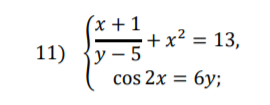

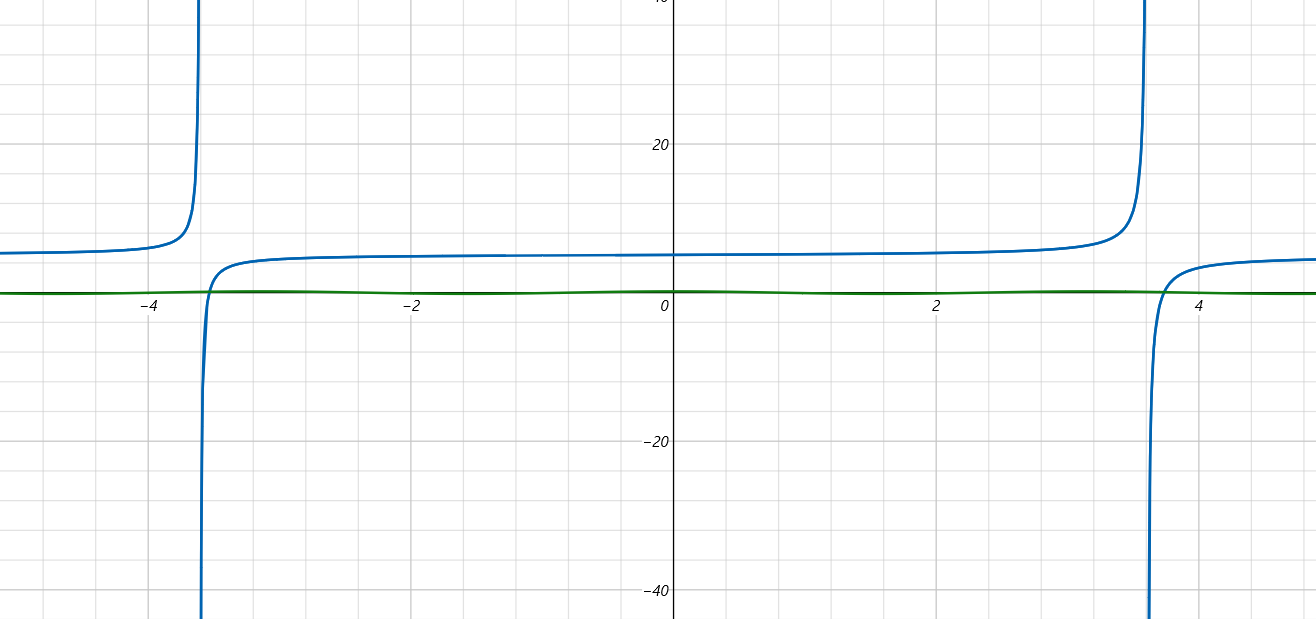

Как видно из графика, система имеет 2 решения. Чтобы показать, что больше решений нет, можно посмотреть $\lim\limits_{x\to \infty} \frac{x+1}{13-x^{2}}+5=\lim\limits_{x\to \infty} \frac{1}{\sqrt{13}-x}+\frac{1-\sqrt{13}}{13-x^{2}}+5=0+0+5=5$. Причем, данное вычисление верно как для $+\infty$, так и для $-\infty$. А функция $y=\frac{1}{6}cos(2x)$ принимает значения из промежутка $[-\frac{1}{6}, \frac{1}{6}]$ на всей области определения. Значит больше решений нет. Возьмем начальные приближения для метода Ньютона [-4, 0] и [4, 0] для первого и второго решения соответственно.

In [301]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import time

In [302]:
# шаг в замене производной
hx = 1e-5
hy = 1e-7

def f(x, y):
    return np.array([(x + 1) / (y - 5) + x**2 - 13, cos(2*x) - 6*y])


def jacobian(x, y):
    return np.array([
        [2 * x + 1 / (y - 5), -(x + 1)/(y - 5)**2],
        [-2 * sin(2 * x), -6]
    ])

def discrete_jacobian(x, y):
    return np.array([
        [(f(x + hx, y)[0] - f(x, y)[0]) / hx, (f(x, y + hy)[0] - f(x, y)[0]) / hy],
        [(f(x + hx, y)[1] - f(x, y)[1]) / hx, (f(x, y + hy)[1] - f(x, y)[1]) / hy]
    ])


def maximum_norm(x):
    return max(abs(x))

def newton_method(x_k, eps):
    print("Method of Newton:")
    delta_k = np.array([1, 1])
    num_of_iterations = 0;
    
    while maximum_norm(delta_k) >= eps:
        num_of_iterations += 1
        delta_k = np.linalg.solve(jacobian(x_k[0], x_k[1]), np.array(f(x_k[0], x_k[1]))*(-1))
        x_k += delta_k
    print("Solution:")
    print(x_k)
    print("f(x)=")
    print(f(x_k[0],x_k[1]))
    print("Number of iterations:")
    print(num_of_iterations)
    
def discrete_newton_method(x_k, eps):
    print("Discrete method of Newton:")
    delta_k = np.array([1, 1])
    num_of_iterations = 0;

    while maximum_norm(delta_k) >= eps:
        num_of_iterations += 1
        delta_k = np.linalg.solve(discrete_jacobian(x_k[0], x_k[1]), np.array(f(x_k[0], x_k[1]))*(-1))
        x_k += delta_k
    print("Solution:")
    print(x_k)
    print("f(x)=")
    print(f(x_k[0],x_k[1]))
    print("Number of iterations:")
    print(num_of_iterations)

In [303]:
#начальные приближения
x1 = [4,0]
x2 = [-4, 0]

#точность вычислений
eps = 1e-6

#находим решения двумя методами
newton_method(x1, eps)
newton_method(x2, eps)
discrete_newton_method(x1, eps)
discrete_newton_method(x2, eps)

Method of Newton:
Solution:
[3.73619392 0.06206668]
f(x)=
[0.00000000e+00 1.11022302e-16]
Number of iterations:
4
Method of Newton:
Solution:
[-3.53286886  0.11818603]
f(x)=
[-1.77635684e-15  1.11022302e-16]
Number of iterations:
4
Discrete method of Newton:
Solution:
[3.73619392 0.06206668]
f(x)=
[0. 0.]
Number of iterations:
4
Discrete method of Newton:
Solution:
[-3.53286886  0.11818603]
f(x)=
[-1.06581410e-14  1.66533454e-14]
Number of iterations:
4


Величины h подбирались экспериментально таким образом, чтобы обеспечить более быструю сходимость дискретного метода Ньютона и большую точность вычислений. Так, например, при hx = 0.5 и hy = 0.5 он сходится за 6 итераций, при hx = 0.1 и hy = 0.01 - за 5 итераций, при hx = 0.01 и hy = 0.001 - уже за 4 итерации. При дальнейшем уменьшении значений h кол-во необходимых итераций не уменьшается, но растет точность вычислений. Окончательный выбор: hx= 0.00001, hy = 0.0000001.  
__Сравнение методов__: оба метода сошлись за одинаковое кол-во итераций (4). Для первого решения метод Ньютона показал чуть более точный результат, а для второго наоборот.  
__Выводы__: оба метода обладают быстрой сходимостью и их удобно применять для нахождения решений систем нелинейных уравнений.

## Задание 2

Для функции, соответствующей вашему варианту, проделать следующее:
1. Построить интерполяционные многочлены функции $𝑓(𝑥)$ по 6, 12, 18
равноотстоящим узлам.
2. Построить интерполяционные многочлены функции $𝑓(𝑥)$ по 6, 12, 18 узлам
Чебышева.
3. Построить интерполяционные сплайны третьего порядка функции $𝑓(𝑥)$ по 6, 12, 18
равноотстоящим узлам.
4. На графике функции $𝑓(𝑥)$ выбрать 100 случайных точек на отрезке и построить по
ним наилучшие среднеквадратичные приближения для базиса $𝜑_{i}(𝑥) = 𝑥^{𝑖}, 𝑖 = 0̅̅̅,̅𝑛̅$
при 𝑛 = 1, 2, 4, 6.
5. Вывести отчет в формате .txt. В отчет должно входить:  
• Время, затраченное на построение каждого интерполяционного многочлена.  
• Время, затраченное на построение каждого сплайна.  
• Время, затраченное на построение каждого среднеквадратичного приближения.

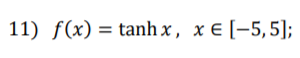

In [304]:
#границы отрезка
a = -5
b = 5

def f(x):
    return tanh(x)

def get_f(nodes):
    size = len(nodes)
    values = np.zeros(size)
    for i in range(0, size):
        values[i] = f(nodes[i])
    return values

#### 1-2. Строю интерполяционные многочлены

In [305]:
def generate_nodes(a, b, n):
    nodes = np.zeros(n)
    h = (b - a) / (n - 1)
    for i in range(0, n):
        nodes[i] = a + i * h
    return nodes

def generate_nus(nodes):
    start_time = time.perf_counter_ns()
    size = len(nodes)
    nu = np.ones(size)
    for i in range(0, size):
        den = 1
        for j in range(0, size):
            if i != j:
                den *= (nodes[i] - nodes[j])
        nu[i] /= den
    print(f"Время построения ИМ по {len(nodes)} равноотстоящим узлам:{time.perf_counter_ns() - start_time}нс")
    return nu

def generate_chebyshev_nodes(a, b, n):
    nodes = np.zeros(n)
    for i in range(0, n):
        nodes[i] = (a + b) / 2 + ((b - a) / 2) * (cos((2 * i + 1) / (2 * (n - 1) + 2) * pi))
    return nodes

def generate_chebyshev_nus(nodes):
    start_time = time.perf_counter_ns()
    size = len(nodes)
    nu = np.zeros(size)
    for i in range(0, size):
        nu[i] = ((-1)**i) * sin((2 * i + 1) / (2 * (size - 1) + 2) * pi)
    print(f"Время построения ИМ по {len(nodes)} Чебышевским узлам:{time.perf_counter_ns() - start_time}нс")
    return nu


def interpolation_polynomial(x, nodes, values, nu):
    size = len(nodes)    
    num = np.zeros(size)
    den = np.zeros(size)
    for i in range(0, size):
        if(x == nodes[i]):
            return values[i]
    for i in range(0, size):
        den[i] = nu[i] / (x - nodes[i])
        num[i] = den[i] * values[i]
    return sum(num) / sum(den)

def interpolation(x, nodes, values, nu):
    size = len(x)
    inter = np.zeros(size)
    for i in range(0, size):
        inter[i] = interpolation_polynomial(x[i], nodes, values, nu)
    return inter

Интерполяционный многочлен по равноотстоящим узлам (6 узлов)

In [306]:
nodes6 = generate_nodes(a, b, 6)
print("Nodes 6:")
print(nodes6)
values6 = get_f(nodes6)
nu6 = generate_nus(nodes6)

Nodes 6:
[-5. -3. -1.  1.  3.  5.]
Время построения ИМ по 6 равноотстоящим узлам:37800нс


Интерполяционный многочлен по равноотстоящим узлам (12 узлов)

In [307]:
nodes12 = generate_nodes(a, b, 12)
print("Nodes 12:")
print(nodes12)
values12 = get_f(nodes12)
nu12 = generate_nus(nodes12)

Nodes 12:
[-5.         -4.09090909 -3.18181818 -2.27272727 -1.36363636 -0.45454545
  0.45454545  1.36363636  2.27272727  3.18181818  4.09090909  5.        ]
Время построения ИМ по 12 равноотстоящим узлам:74500нс


Интерполяционный многочлен по равноотстоящим узлам (18 узлов)

In [308]:
nodes18 = generate_nodes(a, b, 18)
print("Nodes 18:")
print(nodes18)
values18 = get_f(nodes18)
nu18 = generate_nus(nodes18)

Nodes 18:
[-5.         -4.41176471 -3.82352941 -3.23529412 -2.64705882 -2.05882353
 -1.47058824 -0.88235294 -0.29411765  0.29411765  0.88235294  1.47058824
  2.05882353  2.64705882  3.23529412  3.82352941  4.41176471  5.        ]
Время построения ИМ по 18 равноотстоящим узлам:146500нс


Интерполяционный многочлен по узлам Чебышёва (6 узлов)

In [309]:
chnodes6 = generate_chebyshev_nodes(a, b, 6)
print("Chebyshev nodes 6:")
print(chnodes6)
chvalues6 = get_f(chnodes6)
chnu6 = generate_chebyshev_nus(chnodes6)

Chebyshev nodes 6:
[ 4.82962913  3.53553391  1.29409523 -1.29409523 -3.53553391 -4.82962913]
Время построения ИМ по 6 Чебышевским узлам:10100нс


Интерполяционный многочлен по узлам Чебышёва (12 узлов)

In [310]:
chnodes12 = generate_chebyshev_nodes(a, b, 12)
print("Chebyshev nodes 12:")
print(chnodes12)
chvalues12 = get_f(chnodes12)
chnu12 = generate_chebyshev_nus(chnodes12)

Chebyshev nodes 12:
[ 4.95722431  4.61939766  3.9667667   3.04380715  1.91341716  0.65263096
 -0.65263096 -1.91341716 -3.04380715 -3.9667667  -4.61939766 -4.95722431]
Время построения ИМ по 12 Чебышевским узлам:16800нс


Интерполяционный многочлен по узлам Чебышёва (18 узлов)

In [311]:
chnodes18 = generate_chebyshev_nodes(a, b, 18)
print("Chebyshev nodes 18:")
print(chnodes18)
chvalues18 = get_f(chnodes18)
chnu18 = generate_chebyshev_nus(chnodes18)

Chebyshev nodes 18:
[ 4.98097349  4.82962913  4.53153894  4.09576022  3.53553391  2.86788218
  2.11309131  1.29409523  0.43577871 -0.43577871 -1.29409523 -2.11309131
 -2.86788218 -3.53553391 -4.09576022 -4.53153894 -4.82962913 -4.98097349]
Время построения ИМ по 18 Чебышевским узлам:12400нс


Графики многочленов по равноотстоящим узлам:

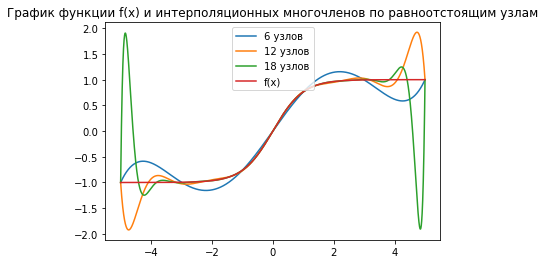

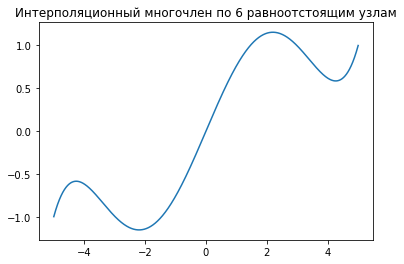

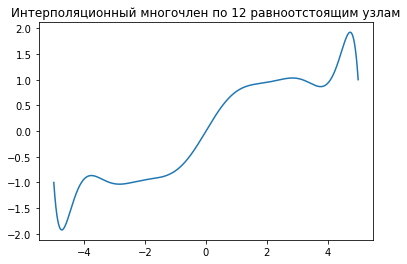

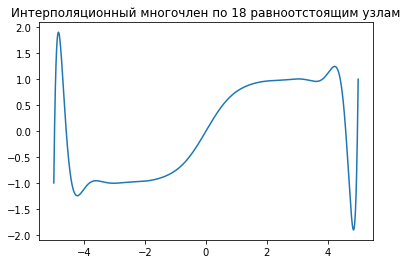

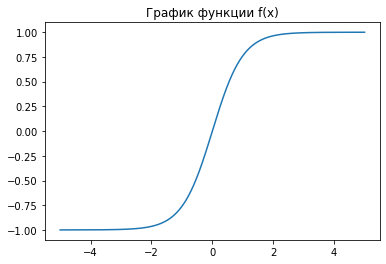

In [312]:
x = np.linspace(a, b, 1000000)
_,p = plt.subplots()

p.plot(x, interpolation(x, nodes6, values6, nu6), label = "6 узлов")
p.plot(x, interpolation(x, nodes12, values12, nu12), label = "12 узлов")
p.plot(x, interpolation(x, nodes18, values18, nu18), label = "18 узлов")
p.plot(x, get_f(x), label = "f(x)")
p.set_title("График функции f(x) и интерполяционных многочленов по равноотстоящим узлам")
p.legend(loc = 'upper center')

_,p = plt.subplots()
p.plot(x, interpolation(x, nodes6, values6, nu6))
p.set_title("Интерполяционный многочлен по 6 равноотстоящим узлам")

_,p = plt.subplots()
p.plot(x, interpolation(x, nodes12, values12, nu12))
p.set_title("Интерполяционный многочлен по 12 равноотстоящим узлам")
 
_,p = plt.subplots()
p.plot(x, interpolation(x, nodes18, values18, nu18))
p.set_title("Интерполяционный многочлен по 18 равноотстоящим узлам")

_,p = plt.subplots()
p.plot(x, get_f(x))
p.set_title("График функции f(x)")

plt.show()

Графики многочленов по Чебышевским узлам:

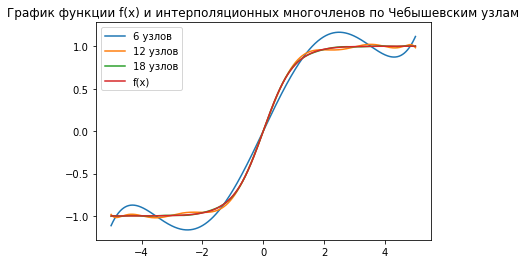

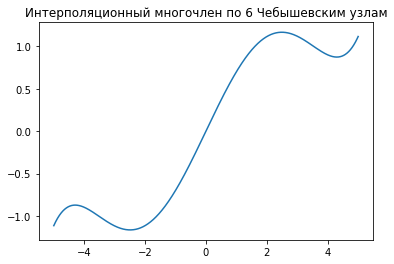

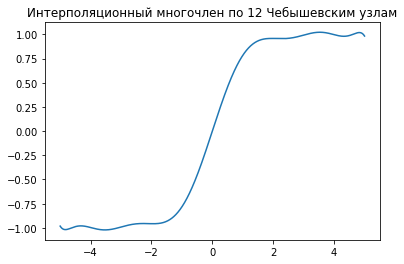

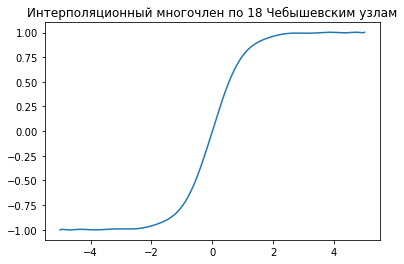

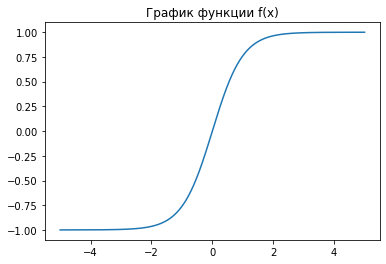

In [313]:
_,p = plt.subplots()

p.plot(x, interpolation(x, chnodes6, chvalues6, chnu6), label = "6 узлов")
p.plot(x, interpolation(x, chnodes12, chvalues12, chnu12), label = "12 узлов")
p.plot(x, interpolation(x, chnodes18, chvalues18, chnu18), label = "18 узлов")
p.plot(x, get_f(x), label = "f(x)")
p.set_title("График функции f(x) и интерполяционных многочленов по Чебышевским узлам")
p.legend()

_,p = plt.subplots()
p.plot(x, interpolation(x, chnodes6, chvalues6, chnu6))
p.set_title("Интерполяционный многочлен по 6 Чебышевским узлам")

_,p = plt.subplots()
p.plot(x, interpolation(x, chnodes12, chvalues12, chnu12))
p.set_title("Интерполяционный многочлен по 12 Чебышевским узлам")

_,p = plt.subplots()
p.plot(x, interpolation(x, chnodes18, chvalues18, chnu18))
p.set_title("Интерполяционный многочлен по 18 Чебышевским узлам")

_,p = plt.subplots()
p.plot(x, get_f(x), label = "f(x)")
p.set_title("График функции f(x)")

plt.show()

#### Строю интерполяционные сплайны 3 порядка  
возьмем граничные условия $S''(x_{0})=S''(x_{n})=0$

In [314]:
def calc_h(x):
    size = len(x)
    h = np.zeros(size)
    for i in range(1, size):
        h[i] = x[i] - x[i - 1]
    return h

def calc_alpha(y):
    return y[1:]

def calc_beta(y, gamma, h):
    size = len(y)
    beta = np.zeros(size) 
    for i in range(1, size):
        beta[i] = (y[i] - y[i - 1]) / h[i] + (2 * gamma[i] + gamma[i - 1]) / 6.0 * h[i]
    return beta

def calc_gamma(x, y, h):
    c, e, b = calc_ceb(x, y, h)
    gamma = solve_slau(c, e, b, len(x))
    gamma = np.append(gamma, 0)
    return gamma

def calc_delta(x, gamma, h):
    size = len(x)
    delta = np.zeros(size)
    for i in range(1, size):
        delta[i] = (gamma[i] - gamma[i - 1]) / h[i]
    return delta

def calc_ceb(x, y, h):
    size = len(x) - 3
    b = np.zeros(size + 1)
    c = np.zeros(size + 1)
    e = np.zeros(size + 1)
    for i in range(1, len(x) - 1):
        c[i - 1] = h[i] / (h[i] + h[i + 1])
        e[i - 1] = h[i + 1] / (h[i] + h[i + 1])
        b[i - 1] = 6.0 * ((y[i + 1] - y[i]) / h[i + 1] - (y[i] - y[i - 1]) / h[i]) / (h[i] + h[i + 1])
    return c[1:], e[:len(e) - 1], b

def solve_slau(c, e, b, n):
    str_num = n - 2
    d = np.full(str_num, 2.0)
    for i in range(1, str_num):
        d[i] -= e[i - 1] * c[i - 1] / d[i - 1]
        b[i] -= b[i - 1] * c[i - 1] / d[i - 1]
    gamma = np.zeros(str_num)
    gamma[-1] = b[-1] / d[-1]
    for i in range(str_num - 2, -1, -1):
        gamma[i] = (b[i] - e[i] * gamma[i + 1]) / d[i]
    gamma = np.insert(gamma, 0, 0)
    return gamma

def spline(x, nodes, coefs):
    size = len(x)
    a, b, g, d = coefs
    y = np.zeros(size)
    for i in range(0, size):
        for j in range(0, len(nodes) - 1):
            if(x[i] < nodes[j + 1] and x[i] >= nodes[j]):
                y[i] = a[j]+b[j]*(x[i]-nodes[j+1])+g[j]/2*(x[i]-nodes[j+1])**2+d[j]/6*(x[i]-nodes[j+1])**3
        if(x[i] == nodes[-1]):
            y[i] = a[j]+b[j]*(x[i]-nodes[-1])+g[j]/2*(x[i]-nodes[-1])**2+d[j]/6*(x[i]-nodes[-1])**3
    return y
            
def calc_coefs(x):
    y = get_f(x)
    start_time = time.perf_counter_ns()
    h = calc_h(x)
    gamma = calc_gamma(x, y, h)
    alpha = calc_alpha(y)
    beta = calc_beta(y, gamma, h)
    delta = calc_delta(x, gamma, h)
    print(f"Время построения кубического сплайна по {len(x)} узлам:{time.perf_counter_ns() - start_time}нс")
    return [alpha, beta[1:], gamma[1:], delta[1:]]

Кубический сплайн по 6 узлам:

In [315]:
coefs6 = calc_coefs(nodes6)
print(coefs6)

Время построения кубического сплайна по 6 узлам:171700нс
[array([-0.99505475, -0.76159416,  0.76159416,  0.99505475,  0.9999092 ]), array([-0.05247362,  0.5374894 ,  0.5374894 , -0.05247362,  0.02987765]), array([-0.08235126,  0.67231428, -0.67231428,  0.08235126,  0.        ]), array([-0.04117563,  0.37733277, -0.67231428,  0.37733277, -0.04117563])]


Кубический сплайн по 12 узлам:

In [316]:
coefs12 = calc_coefs(nodes12)
print(coefs12)

Время построения кубического сплайна по 12 узлам:381900нс
[array([-0.99944077, -0.99655975, -0.97899231, -0.87723379, -0.4256282 ,
        0.4256282 ,  0.87723379,  0.97899231,  0.99655975,  0.99944077,
        0.9999092 ]), array([6.81700704e-04, 7.89433486e-03, 3.52208764e-02, 2.44997840e-01,
       8.10889340e-01, 8.10889340e-01, 2.44997840e-01, 3.52208764e-02,
       7.89433486e-03, 6.81700704e-04, 4.32065319e-04]), array([ 5.49197846e-04,  1.53185973e-02,  4.47997940e-02,  4.16709525e-01,
        8.28251777e-01, -8.28251777e-01, -4.16709525e-01, -4.47997940e-02,
       -1.53185973e-02, -5.49197846e-04,  0.00000000e+00]), array([ 6.04117631e-04,  1.62463394e-02,  3.24293164e-02,  4.09100704e-01,
        4.52696477e-01, -1.82215391e+00,  4.52696477e-01,  4.09100704e-01,
        3.24293164e-02,  1.62463394e-02,  6.04117631e-04])]


Кубический сплайн по 18 узлам:

In [317]:
coefs18 = calc_coefs(nodes18)
print(coefs18)

Время построения кубического сплайна по 18 узлам:399100нс
[array([-0.99970559, -0.99904556, -0.99690816, -0.99000808, -0.9679562 ,
       -0.89968961, -0.70759612, -0.28592028,  0.28592028,  0.70759612,
        0.89968961,  0.9679562 ,  0.99000808,  0.99690816,  0.99904556,
        0.99970559,  0.9999092 ]), array([5.69988585e-04, 1.89038793e-03, 6.13535247e-03, 1.96593437e-02,
       6.28822647e-02, 1.89435836e-01, 5.07210797e-01, 9.11944564e-01,
       9.11944564e-01, 5.07210797e-01, 1.89435836e-01, 6.28822647e-02,
       1.96593437e-02, 6.13535247e-03, 1.89038793e-03, 5.69988585e-04,
       2.34227900e-04]), array([ 0.00114159,  0.00334777,  0.01108511,  0.03489646,  0.11206147,
        0.31822067,  0.76221419,  0.61388061, -0.61388061, -0.76221419,
       -0.31822067, -0.11206147, -0.03489646, -0.01108511, -0.00334777,
       -0.00114159,  0.        ]), array([ 1.94069676e-03,  3.75051469e-03,  1.31534721e-02,  4.04793022e-02,
        1.31180512e-01,  3.50470647e-01,  7.54788985e-0

Графики кубических сплайнов:

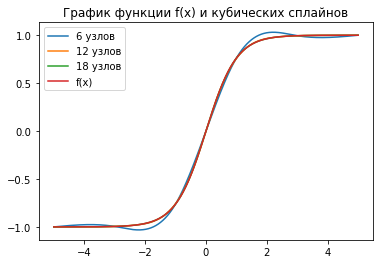

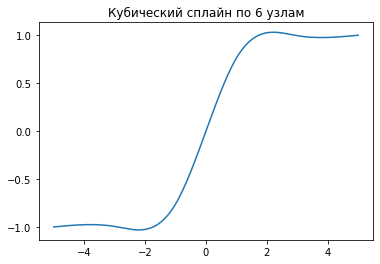

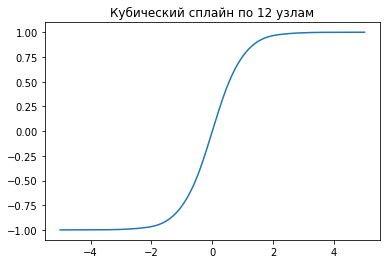

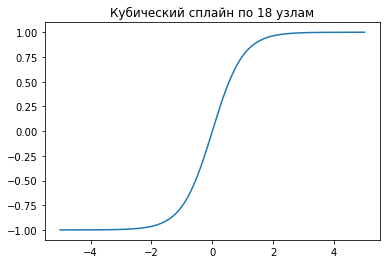

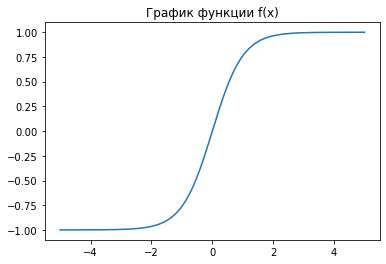

In [318]:
x = np.linspace(a, b, 100000)
_,p = plt.subplots()

p.plot(x, spline(x, nodes6, coefs6), label = "6 узлов")
p.plot(x, spline(x, nodes12, coefs12), label = "12 узлов")
p.plot(x, spline(x, nodes18, coefs18), label = "18 узлов")
p.plot(x, get_f(x), label = "f(x)")
p.set_title("График функции f(x) и кубических сплайнов")
p.legend()

_,p = plt.subplots()

p.plot(x, spline(x, nodes6, coefs6))
p.set_title("Кубический сплайн по 6 узлам")

_,p = plt.subplots()

p.plot(x, spline(x, nodes12, coefs12))
p.set_title("Кубический сплайн по 12 узлам")

_,p = plt.subplots()

p.plot(x, spline(x, nodes18, coefs18))
p.set_title("Кубический сплайн по 18 узлам")

_,p = plt.subplots()

p.plot(x, get_f(x), label = "f(x)")
p.set_title("График функции f(x)")
plt.show()

#### Строю наилучшие среднеквадратичные приближения

In [319]:
import random

n = 2

def phi(x, i):
    return x**i

def generate_nodes(n):
    nodes = []
    for i in range(0, n):
        x = random.uniform(-5, 5)
        nodes.append([x, f(x)])
    return nodes

def calc_beta(nodes, n):
    beta = np.zeros(n + 1)
    for i in range(0, n + 1):
        for x, y in nodes:
            beta[i] += y * phi(x, i)
    return beta

def calc_gamma(nodes, n):
    gamma = [[0] * (n + 1) for i in range(n + 1)]
    for i in range(0, n + 1):
        for j in range(i, n + 1):
            for x, _ in nodes:
                gamma[i][j] += phi(x, j) * phi(x, i)
                gamma[j][i] = gamma[i][j]
    return gamma

def calc_coefs(nodes, n):
    beta = calc_beta(nodes, n)
    gamma = calc_gamma(nodes, n)
    return np.linalg.solve(gamma, beta)
    
def rms_approximation(x, nodes, n):
    size =  len(x)
    res = np.zeros(size)
    start_time = time.perf_counter_ns()
    coefs = calc_coefs(nodes, n)
    print(f"Время построения среднеквадратичного приближения при n={n}:{time.perf_counter_ns() - start_time}нс")
    for i in range(0, size):
        for j in range(0, n + 1):
            res[i] += coefs[j] * phi(x[i], j)
    return res

Графики среднеквадратичных приближений

Время построения среднеквадратичного приближения при n=1:295600нс
Время построения среднеквадратичного приближения при n=2:424400нс
Время построения среднеквадратичного приближения при n=4:858200нс
Время построения среднеквадратичного приближения при n=6:1666800нс


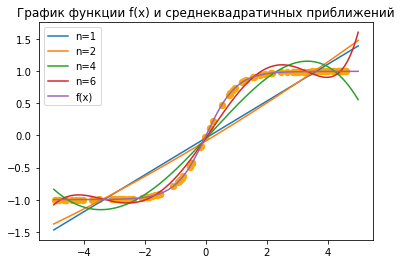

In [320]:
nodes = generate_nodes(100)

x = np.linspace(a, b, 100000)
_,p = plt.subplots()
p.plot(x, rms_approximation(x, nodes, 1), label = "n=1")
p.plot(x, rms_approximation(x, nodes, 2), label = "n=2")
p.plot(x, rms_approximation(x, nodes, 4), label = "n=4")
p.plot(x, rms_approximation(x, nodes, 6), label = "n=6")
p.plot(x, get_f(x), label = "f(x)")
p.set_title("График функции f(x) и среднеквадратичных приближений")
p.legend()
plt.scatter([row[0] for row in nodes], [row[1] for row in nodes], color='orange', s=40, marker='o')

__Выводы__:  
1-2. Чем больше узлов интерполирования мы берем, тем больше времени тратится на построение ИМ. Но также в ходе ЛР можно заметить, что построение ИМ по узлам Чебышева происходит быстрее, чем по равноотстоящим узлам. В замер времени НЕ входила генерация узлов интерполирования. ИМ был построен по барицентрической формуле: 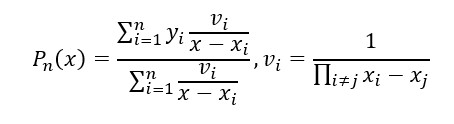 Чебышевские узлы были рассчитаны по формуле: 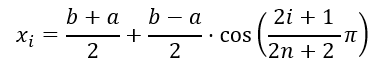 Коэффициенты находились по формуле: 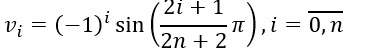 Также стоит отметить, что, как выше показано на графиках, с увеличением числа узлов ИМ по равноотстоящим узлам начинает лучше приближать нашу функцию в середине отрезка, а вот по краям разница между их значениями возрастает, что не скажешь о ИМ по Чебышевским узлам.     
3. Сплайны строились по формуле 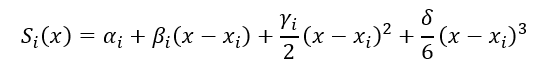 Для построения сплайнов были взяты граничные условия $S''(x_{0})=S''(x_{n})=0$. Так же,как и в предыдущем пункте, с ростом числа узлов растет время, затраченное на построение сплайна. Что вполне логично, ведь чем больше узлов, тем больше коэффициентов нам нужно посчитать. Но зато чем больше узлов, тем точнее приближение (видно на графике). Сплайн строится дольше, чем ИМ, но, как опять же видно из графиков выше, более точно приближает нашу функцию.  
4. Среднеквадратичные приближения не так точно приближают всю функцию на отрезке, как ИМ или кубические сплайны, но с ростом n их точность также возрастает.  
  
Время затраченное на построение ИМ по равноотстоящим узлам:  
  
по 6 узлам : 43800нс  
по 12 узлам : 131000нс  
по 18 узлам : 209000нс  
  
Время затраченное на построение ИМ по Чебышевским узлам:  
  
по 6 узлам : 8000нс  
по 12 узлам : 13500нс  
по 18 узлам : 14100нс  

Время затраченное на построение кубического сплайна:  
  
по 6 узлам : 214900нс  
по 12 узлам : 225900нс  
по 18 узлам : 357600нс  
  
Время затраченное на построение среднеквадратичного приближения:  
  
n = 1 : 280200нс  
n = 2 : 450500нс  
n = 4 : 868200нс  
n = 6 : 1482800нс  
Быстрее всего строится ИМ по узлам Чебышева, что вполне логично, так как для этого нам не нужно, например,  как в барицентрической формуле n раз считать n произведений.  

## Задание 3

Для функции, соответствующей вашему варианту, проделать следующее:
1. Построить интерполяционные многочлены двух переменных функции $𝑔(𝑥, 𝑦)$ на
прямоугольнике по сеткам 6 × 6, 12 × 12, 18 × 18 равноотстоящих узлов.
2. Построить бикубические сплайны функции $𝑔(𝑥, 𝑦)$ на прямоугольнике по сеткам
6 × 6, 12 × 12, 18 × 18 равноотстоящих узлов.
3. Вывести отчет в формате .txt. В отчет должно входить:  
• Время, затраченное на построение каждого интерполяционного многочлена
двух переменных.  
• Время, затраченное на построение каждого бикубического сплайна.

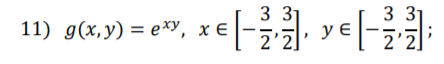

In [321]:
#границы отрезка
a = -1.5
b = 1.5
def g(x, y):
    return exp(x * y)
def get_g(x, y):
    g_res = [[0] * (len(y)) for i in range(len(x))]
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            g_res[i][j] = g(x[i], y[j])
    return g_res

Строю ИМ:

In [322]:
def generate_nodes(a, b, n):
    nodes = np.zeros(n)
    h = (b - a) / (n - 1)
    for i in range(0, n):
        nodes[i] = a + i * h
    return nodes

nodes_x6 = generate_nodes(a, b, 6)
nodes_y6 = generate_nodes(a, b, 6)

nodes_x12 = generate_nodes(a, b, 12)
nodes_y12 = generate_nodes(a, b, 12)

nodes_x18 = generate_nodes(a, b, 18)
nodes_y18 = generate_nodes(a, b, 18)

In [323]:
def get_interpolated_z(x, y, nodes_x, nodes_y, n):
    g_res = [[0] * (len(y)) for i in range(len(x))]
    start_time = time.perf_counter_ns()
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            g_res[i][j] = interpolation_one(x[i], y[j], nodes_x, nodes_y, n)
    print(f"Время построения ИМ по {n}x{n} равноотстоящим узлам : {time.perf_counter_ns() - start_time}нс")
    return g_res

def interpolation_one(x, y, nodes_x, nodes_y, n):
    s = 0
    for i in range(0, n):
        for j in range(0, n):
            p = multyply(x, y, i, j, nodes_x, nodes_y)
            s += p * g(nodes_x[i], nodes_y[j])
    return s

def multyply(x, y, i, j, nodes_x, nodes_y):
    mult = 1
    for p in range(0, len(nodes_x)):
        if(p != i):
            mult *= (x - nodes_x[p]) / (nodes_x[i] - nodes_x[p])
    for q in range(0, len(nodes_y)):
        if(q != j):
            mult *= (y - nodes_y[q]) / (nodes_y[j] - nodes_y[q])
    return mult

Строю график функции g(x, y) и ИМ:

Время построения ИМ по 6x6 равноотстоящим узлам : 3195801300нс
Время построения ИМ по 12x12 равноотстоящим узлам : 24007519300нс
Время построения ИМ по 18x18 равноотстоящим узлам : 79801814800нс


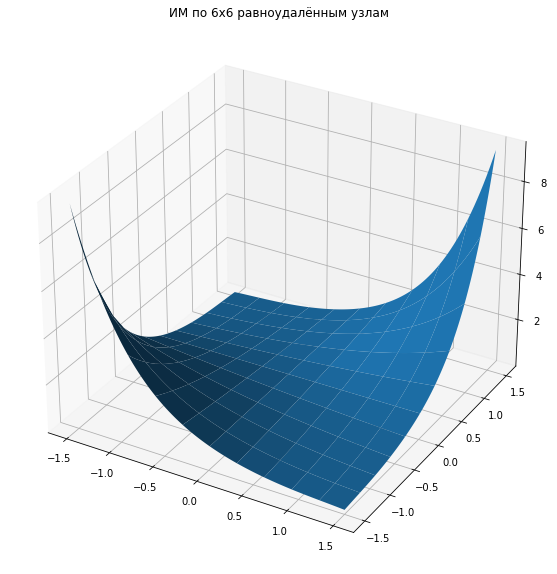

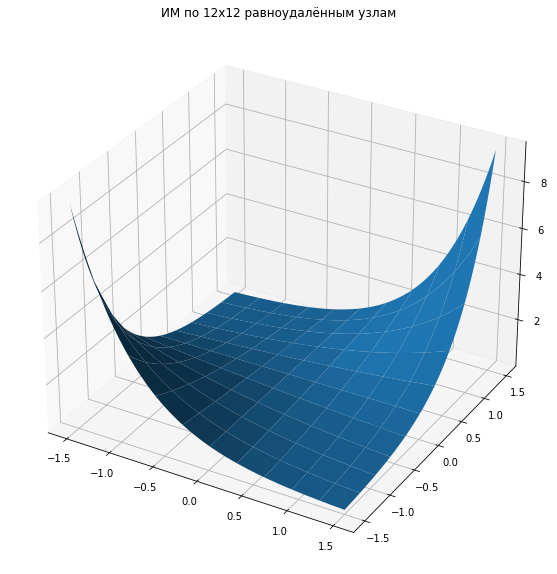

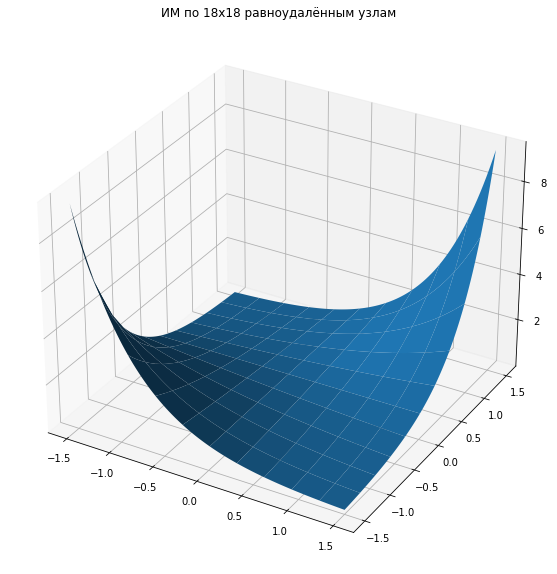

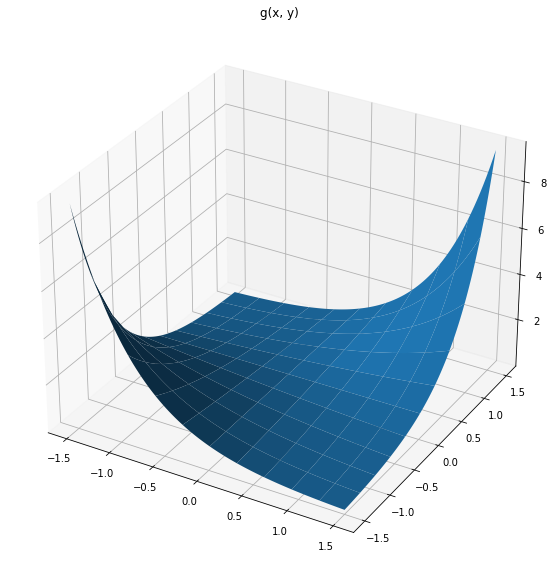

In [324]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z_i = get_interpolated_z(xval, yval, nodes_x6, nodes_y6, 6)
plt.title("ИМ по 6х6 равноудалённым узлам")
surf1 = ax.plot_surface(x, y, np.array(z_i),rstride = 10,cstride = 10)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z_i = get_interpolated_z(xval, yval, nodes_x12, nodes_y12, 12)
plt.title("ИМ по 12х12 равноудалённым узлам")
surf1 = ax.plot_surface(x, y, np.array(z_i),rstride = 10,cstride = 10)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z_i = get_interpolated_z(xval, yval, nodes_x18, nodes_y18, 18)
plt.title("ИМ по 18х18 равноудалённым узлам")
surf1 = ax.plot_surface(x, y, np.array(z_i),rstride = 10,cstride = 10)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z = get_g(xval, yval)
plt.title("g(x, y)")
surf = ax.plot_surface(x, y, np.array(z),rstride = 10,cstride = 10)

Строю бикубические сплайны:

In [325]:
#функции для рассчета коэффициентов взяты из задания №2
def calc_h(x):
    size = len(x)
    h = np.zeros(size)
    for i in range(1, size):
        h[i] = x[i] - x[i - 1]
    return h

def calc_alpha(y):
    return np.array(y[1:])

def calc_beta(y, gamma, h):
    size = len(y)
    beta = np.zeros(size) 
    for i in range(1, size):
        beta[i] = (y[i] - y[i - 1]) / h[i] + (2 * gamma[i] + gamma[i - 1]) / 6.0 * h[i]
    return beta

def calc_gamma(x, y, h):
    c, e, b = calc_ceb(x, y, h)
    gamma = solve_slau(c, e, b, len(x))
    gamma = np.append(gamma, 0)
    return gamma

def calc_delta(x, gamma, h):
    size = len(x)
    delta = np.zeros(size)
    for i in range(1, size):
        delta[i] = (gamma[i] - gamma[i - 1]) / h[i]
    return delta

def calc_ceb(x, y, h):
    size = len(x) - 3
    b = np.zeros(size + 1)
    c = np.zeros(size + 1)
    e = np.zeros(size + 1)
    for i in range(1, len(x) - 1):
        c[i - 1] = h[i] / (h[i] + h[i + 1])
        e[i - 1] = h[i + 1] / (h[i] + h[i + 1])
        b[i - 1] = 6.0 * ((y[i + 1] - y[i]) / h[i + 1] - (y[i] - y[i - 1]) / h[i]) / (h[i] + h[i + 1])
    return c[1:], e[:len(e) - 1], b

def solve_slau(c, e, b, n):
    str_num = n - 2
    d = np.full(str_num, 2.0)
    for i in range(1, str_num):
        d[i] -= e[i - 1] * c[i - 1] / d[i - 1]
        b[i] -= b[i - 1] * c[i - 1] / d[i - 1]
    gamma = np.zeros(str_num)
    gamma[-1] = b[-1] / d[-1]
    for i in range(str_num - 2, -1, -1):
        gamma[i] = (b[i] - e[i] * gamma[i + 1]) / d[i]
    gamma = np.insert(gamma, 0, 0)
    return gamma
            
def calc_coefs(x, y):
    h = calc_h(x)
    gamma = calc_gamma(x, y, h)
    alpha = calc_alpha(y)
    beta = calc_beta(y, gamma, h)
    delta = calc_delta(x, gamma, h)
    return [alpha, beta[1:], gamma[1:], delta[1:]]

def spline(x, nodes, coefs):
    size = len(x)
    a, b, g, d = coefs
    y = np.zeros(size)
    for i in range(0, size):
        for j in range(0, len(nodes) - 1):
            if(x[i] < nodes[j + 1] and x[i] >= nodes[j]):
                y[i] = a[j]+b[j]*(x[i]-nodes[j+1])+g[j]/2*(x[i]-nodes[j+1])**2+d[j]/6*(x[i]-nodes[j+1])**3
        if(x[i] == nodes[-1]):
            y[i] = a[j]+b[j]*(x[i]-nodes[-1])+g[j]/2*(x[i]-nodes[-1])**2+d[j]/6*(x[i]-nodes[-1])**3
    return y

def calc_coefs2(x, y):
    z = get_g(x, y)
    coefs = [None] * len(z)
    for i in range(0, len(z)):
        coefs[i] = calc_coefs(x, z[i])
    spline_coefs = [None] * (len(x) - 1)
    for i in range(0, len(x) - 1):
        alphas = [coef[0][i] for coef in coefs]
        betas = [coef[1][i] for coef in coefs]
        gammas = [coef[2][i] for coef in coefs]
        deltas = [coef[3][i] for coef in coefs]
        spline_coefs[i] = [None] * 4
        spline_coefs[i][0] = calc_coefs(y, alphas)
        spline_coefs[i][1] = calc_coefs(y, betas)
        spline_coefs[i][2] = calc_coefs(y, gammas)
        spline_coefs[i][3] = calc_coefs(y, deltas)
    return spline_coefs

def spline2(x, y, nodes_x, nodes_y):
    start_time = time.perf_counter_ns()
    coefs = calc_coefs2(nodes_x, nodes_y)
    print(f"Время построения бикубического сплайна по {len(nodes_x)}x{len(nodes_y)} узлам:{time.perf_counter_ns() - start_time}нс")
    z = [[0] * len(y) for i in range(len(x))]
    
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            for k in range(0, len(coefs)):
                if(x[i] < nodes_x[k + 1] and x[i] >= nodes_x[k]):
                    a = spline([y[j]], nodes_y, coefs[k][0])[0]
                    b = spline([y[j]], nodes_y, coefs[k][1])[0]
                    g = spline([y[j]], nodes_y, coefs[k][2])[0]
                    d = spline([y[j]], nodes_y, coefs[k][3])[0]
                    z[i][j] = a+b*(x[i]-nodes_x[k+1])+g/2*(x[i]-nodes_x[k+1])**2+d/6*(x[i]-nodes_x[k+1])**3
            if(x[i] == nodes_x[-1]):
                a = spline([y[j]], nodes_y, coefs[-1][0])[0]
                b = spline([y[j]], nodes_y, coefs[-1][1])[0]
                g = spline([y[j]], nodes_y, coefs[-1][2])[0]
                d = spline([y[j]], nodes_y, coefs[-1][3])[0]
                z[i][j] = a+b*(x[i]-nodes_x[-1])+g/2*(x[i]-nodes_x[-1])**2+d/6*(x[i]-nodes_x[-1])**3
    return z

In [326]:
nodes_x6 = generate_nodes(a, b, 6)
nodes_y6 = generate_nodes(a, b, 6)

nodes_x12 = generate_nodes(a, b, 12)
nodes_y12 = generate_nodes(a, b, 12)

nodes_x18 = generate_nodes(a, b, 18)
nodes_y18 = generate_nodes(a, b, 18)

Строю график функции g(x, y) и бикубических сплайнов:

Время построения бикубического сплайна по 6x6 узлам:2506100нс
Время построения бикубического сплайна по 12x12 узлам:6596800нс
Время построения бикубического сплайна по 18x18 узлам:12864500нс


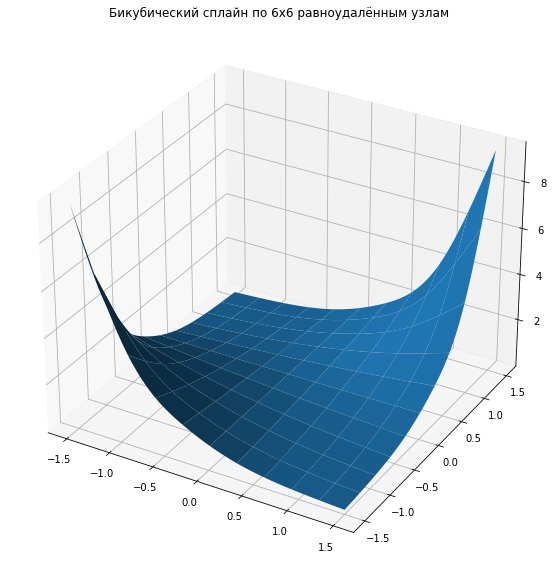

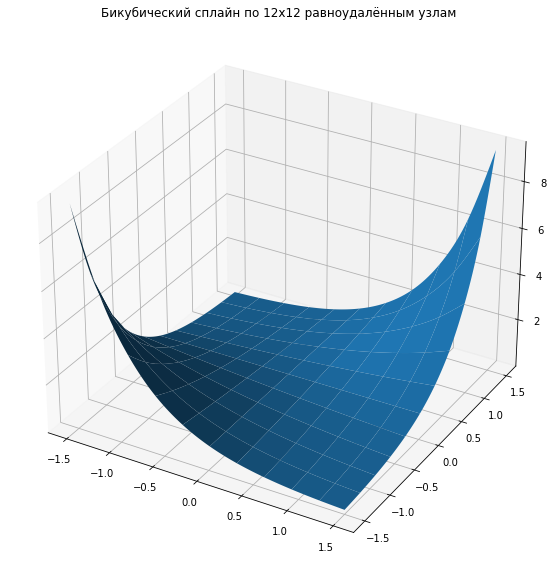

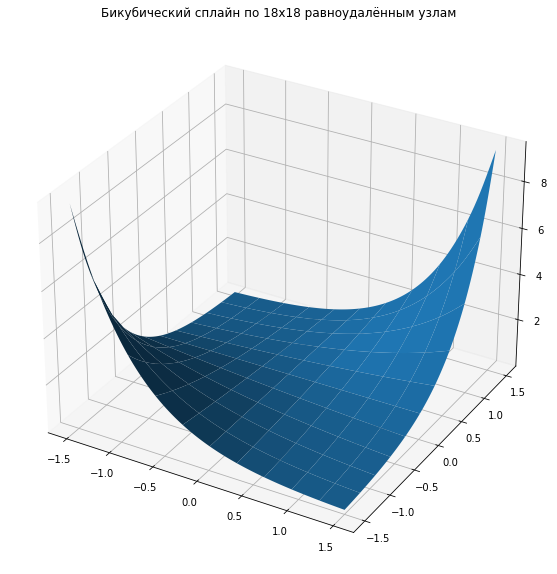

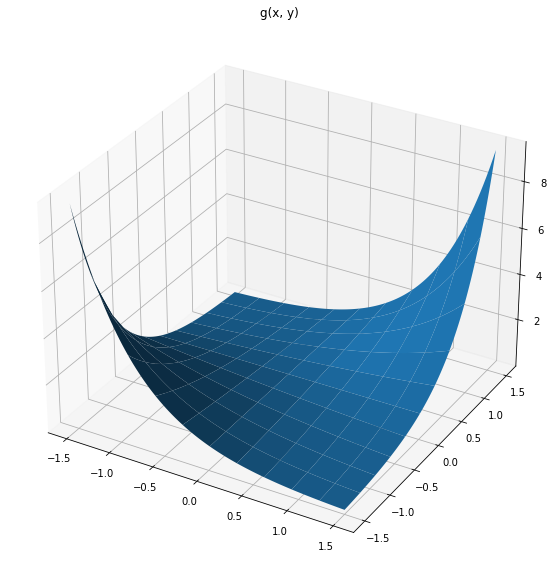

In [327]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z_i = spline2(xval, yval, nodes_x6, nodes_y6)
plt.title("Бикубический сплайн по 6х6 равноудалённым узлам")
surf1 = ax.plot_surface(x, y, np.array(z_i),rstride = 10,cstride = 10)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z_i = spline2(xval, yval, nodes_x12, nodes_y12)
plt.title("Бикубический сплайн по 12х12 равноудалённым узлам")
surf1 = ax.plot_surface(x, y, np.array(z_i),rstride = 10,cstride = 10)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z_i = spline2(xval, yval, nodes_x18, nodes_y18)
plt.title("Бикубический сплайн по 18х18 равноудалённым узлам")
surf1 = ax.plot_surface(x, y, np.array(z_i),rstride = 10,cstride = 10)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(1, 1, 1, projection = '3d')
xval = np.linspace(a, b, 100)
yval = np.linspace(a, b, 100)
x, y = np.meshgrid(xval, yval)

z = get_g(xval, yval)
plt.title("g(x, y)")
surf = ax.plot_surface(x, y, np.array(z),rstride = 10,cstride = 10)

Время построения ИМ по 6x6 равноотстоящим узлам : 3079274900нс  
Время построения ИМ по 12x12 равноотстоящим узлам : 23658413700нс  
Время построения ИМ по 18x18 равноотстоящим узлам : 80607773700нс  
  
Время построения ИМ по 6x6 равноотстоящим узлам : 2866484200нс  
Время построения ИМ по 12x12 равноотстоящим узлам : 23087570800нс  
Время построения ИМ по 18x18 равноотстоящим узлам : 80271083100нс  
__Выводы__: 
Для приближения заданной поверхности были построены многочлены Лагранжа и бикубические сплайны.
С увеличением числа узлов растет время построения и бикубических сплайнов, и интерполяционных многочленов. 
Интерполяционные многочлены Лагранжа строятся медленнее, чем бикубические сплайны, так как для каждой точки для ИМ Лагранжа нам необходимо находить все произведения. В сплайнах же у нас есть заранее просчитанные коэффициенты, что позволяет ускорить  построение. 
Как видно по графикам, оба метода достаточно хорошо приближают заданную поверхность.